In [97]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [113]:
code = '035720' # 카카오 종목코드
page = 7500 # 크롤 희망 페이지 (페이지당 20개 댓글)

date_list = [] # 날짜
comment_list = [] # 댓글
good_list = [] # 좋아요
bad_list = [] # 싫어요

for i in range(1,page+1):
    url = f'https://finance.naver.com/item/board.naver?code={code}&page={i}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 Edg/100.0.1185.50'}
    res = requests.get(url, headers = headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    
    for j in range(20):
        root = bs.find('div',{'class':'section inner_sub'}).find_all('tr',{'onmouseover':'mouseOver(this)'})[j].text.split('\n')
        
        date_list.append(root[1].split()[0].replace('.','-'))
        if len(root) == 13:
            comment_list.append('답글:'+root[4])
            good_list.append(root[11])
            bad_list.append(root[12])
        else:
            comment_list.append(root[3])
            good_list.append(root[10])
            bad_list.append(root[11])
    
    if i % 100 == 0:
        print(f'{i}페이지 크롤링 완료')
    

100페이지 크롤링 완료
200페이지 크롤링 완료
300페이지 크롤링 완료
400페이지 크롤링 완료
500페이지 크롤링 완료
600페이지 크롤링 완료
700페이지 크롤링 완료
800페이지 크롤링 완료
900페이지 크롤링 완료
1000페이지 크롤링 완료
1100페이지 크롤링 완료
1200페이지 크롤링 완료
1300페이지 크롤링 완료
1400페이지 크롤링 완료
1500페이지 크롤링 완료
1600페이지 크롤링 완료
1700페이지 크롤링 완료
1800페이지 크롤링 완료
1900페이지 크롤링 완료
2000페이지 크롤링 완료
2100페이지 크롤링 완료
2200페이지 크롤링 완료
2300페이지 크롤링 완료
2400페이지 크롤링 완료
2500페이지 크롤링 완료
2600페이지 크롤링 완료
2700페이지 크롤링 완료
2800페이지 크롤링 완료
2900페이지 크롤링 완료
3000페이지 크롤링 완료
3100페이지 크롤링 완료
3200페이지 크롤링 완료
3300페이지 크롤링 완료
3400페이지 크롤링 완료
3500페이지 크롤링 완료
3600페이지 크롤링 완료
3700페이지 크롤링 완료
3800페이지 크롤링 완료
3900페이지 크롤링 완료
4000페이지 크롤링 완료
4100페이지 크롤링 완료
4200페이지 크롤링 완료
4300페이지 크롤링 완료
4400페이지 크롤링 완료
4500페이지 크롤링 완료
4600페이지 크롤링 완료
4700페이지 크롤링 완료
4800페이지 크롤링 완료
4900페이지 크롤링 완료
5000페이지 크롤링 완료
5100페이지 크롤링 완료
5200페이지 크롤링 완료
5300페이지 크롤링 완료
5400페이지 크롤링 완료
5500페이지 크롤링 완료
5600페이지 크롤링 완료
5700페이지 크롤링 완료
5800페이지 크롤링 완료
5900페이지 크롤링 완료
6000페이지 크롤링 완료
6100페이지 크롤링 완료
6200페이지 크롤링 완료
6300페이지 크롤링 완료
6400페이지 크롤링 완료
6500페이지 크롤링 완료
6600페이지 크롤링 완료
6700페이지 크롤링 완료
6800

In [114]:
df = pd.DataFrame()
df['날짜'] = date_list
df['댓글'] = comment_list
df['좋아요'] = good_list
df['싫어요'] = bad_list

<function matplotlib.pyplot.show(close=None, block=None)>

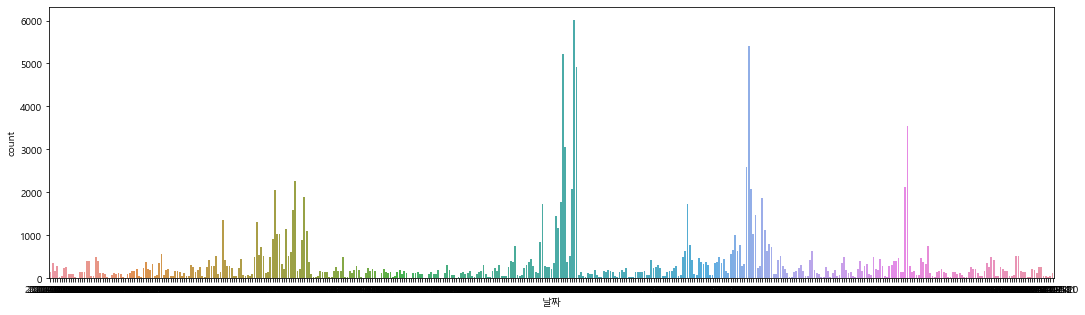

In [115]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['날짜'])
plt.show

In [122]:
df.tail() # 아 왜이래 ㅠ

,날짜,댓글,좋아요,싫어요
149995,2021-02-10,답글:\t\t\t\t,3,
149996,2021-02-10,답글:\t\t\t\t,0,
149997,2021-02-10,답글:\t\t\t\t,0,
149998,2021-02-10,답글:\t\t\t\t,0,
149999,2021-02-10,답글:\t\t\t\t,0,


In [117]:
df.to_csv("./네이버종토방.csv", index=False, encoding='utf-8-sig')

In [118]:
df.to_csv("./네이버종토방1.csv", index=False)

In [119]:
df.to_csv("./네이버종토방2.csv", index=False,encoding='cp949')

In [120]:
df.to_csv("./네이버종토방3.csv", index=False, encoding='utf-8')

In [ ]:
## 아... 오류났다.. 내일 다시 크롤링해보겠습니다